This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Vector Source

The ``VectorSource`` class is designed to conveniently handle Vector Data (eg. shapefiles). It originates from the ``zonalstats`` module but moved to ``io.gdal`` for better visibility

- managing georeferenced data (grid points or grid polygons, zonal polygons),
- output to vector and raster files available within ogr/gdal
- geopandas dataframe connector

In [1]:
import wradlib as wrl
import matplotlib.pyplot as pl
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

The [wradlib.io.VectorSource](https://docs.wradlib.org/en/latest/generated/wradlib.io.gdal.VectorSource.html) class handles point or polygon vector data by wrapping ogr.DataSource with special functions.

The following example shows how to create different VectorSource objects:

In [2]:
from osgeo import osr

# create gk2 projection osr object
proj_gk2 = osr.SpatialReference()
proj_gk2.ImportFromEPSG(31466)

# Setting up DataSource
box0 = np.array([[2600000., 5630000.],[2600000., 5640000.],
                 [2610000., 5640000.],[2610000., 5630000.],
                 [2600000., 5630000.]])
box1 = np.array([[2610000., 5630000.],[2610000., 5640000.],
                 [2620000., 5640000.],[2620000., 5630000.],
                 [2610000., 5630000.]])
box2 = np.array([[2600000., 5640000.],[2600000., 5650000.],
                 [2610000., 5650000.],[2610000., 5640000.],
                 [2600000., 5640000.]])
box3 = np.array([[2610000., 5640000.],[2610000., 5650000.],
                 [2620000., 5650000.],[2620000., 5640000.],
                 [2610000., 5640000.]])

point0 = np.array(wrl.georef.get_centroid(box0))
point1 = np.array(wrl.georef.get_centroid(box1))
point2 = np.array(wrl.georef.get_centroid(box2))
point3 = np.array(wrl.georef.get_centroid(box3))

# creates Polygons in Datasource
poly = wrl.io.VectorSource(np.array([box0, box1, box2, box3]), srs=proj_gk2, name='poly')

# creates Points in Datasource
point = wrl.io.VectorSource(np.vstack((point0, point1, point2, point3)),
                                  srs=proj_gk2, name='point')

In [3]:
print(poly)

<wradlib.VectorSource>
Type: Polygon
Geometries: 4


Let's have a look at the data, which will be exported as numpy arrays. The property ``data`` exports all available data as numpy arrays:

### numpy access

In [4]:
print(poly.data)
print(point.data)

[[[2600000.0 5630000.0]
  [2600000.0 5640000.0]
  [2610000.0 5640000.0]
  [2610000.0 5630000.0]
  [2600000.0 5630000.0]]

 [[2610000.0 5630000.0]
  [2610000.0 5640000.0]
  [2620000.0 5640000.0]
  [2620000.0 5630000.0]
  [2610000.0 5630000.0]]

 [[2600000.0 5640000.0]
  [2600000.0 5650000.0]
  [2610000.0 5650000.0]
  [2610000.0 5640000.0]
  [2600000.0 5640000.0]]

 [[2610000.0 5640000.0]
  [2610000.0 5650000.0]
  [2620000.0 5650000.0]
  [2620000.0 5640000.0]
  [2610000.0 5640000.0]]]
[[2605000.0 5635000.0]
 [2615000.0 5635000.0]
 [2605000.0 5645000.0]
 [2615000.0 5645000.0]]


### accessing geopandas 

In [5]:
poly.geo.explore()

In [6]:
point.geo.loc[slice(0,2)]

,index,geometry
0,0,POINT (2605000.000 5635000.000)
1,1,POINT (2615000.000 5635000.000)
2,2,POINT (2605000.000 5645000.000)


In [7]:
point.geo.loc[[0,1,3]]

,index,geometry
0,0,POINT (2605000.000 5635000.000)
1,1,POINT (2615000.000 5635000.000)
3,3,POINT (2615000.000 5645000.000)


In [8]:
point.geo.query("index in (0, 2)")

,index,geometry
0,0,POINT (2605000.000 5635000.000)
2,2,POINT (2605000.000 5645000.000)


<AxesSubplot:>

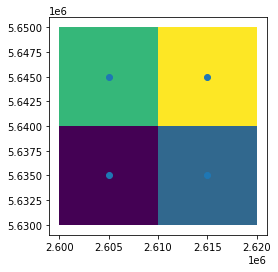

In [9]:
fig = pl.figure()
ax = fig.add_subplot(111)
poly.geo.plot(column="index", ax=ax)
point.geo.plot(ax=ax)

Now, with the DataSource being created, we can add/set attribute data of the features:

In [10]:
# add attribute
poly.set_attribute('mean', np.array([10.1, 20.2, 30.3, 40.4]))
point.set_attribute('mean', np.array([10.1, 20.2, 30.3, 40.4]))

Attributes associated with features can also be retrieved:

In [11]:
# get attributes
print(poly.get_attributes(['mean']))
# get attributes filtered
print(poly.get_attributes(['mean'], filt=('index', 2)))

[[10.1, 20.2, 30.3, 40.4]]
[[30.3]]


Currently data can also be retrieved by:

- index - [wradlib.zonalstats.DataSource.get_data_by_idx()](https://docs.wradlib.org/en/latest/generated/wradlib.zonalstats.DataSource.get_data_by_idx.html),
- attribute - [wradlib.zonalstats.DataSource.get_data_by_att()](https://docs.wradlib.org/en/latest/generated/wradlib.zonalstats.DataSource.get_data_by_att.html) and
- geometry - [wradlib.zonalstats.DataSource.get_data_by_geom()](https://docs.wradlib.org/en/latest/generated/wradlib.zonalstats.DataSource.get_data_by_geom.html).

Using the property `mode` the output type can be set permanently.

### get_data_by_idx

In [12]:
point.get_data_by_idx([0, 2])

array([[2605000.0, 5635000.0],
       [2605000.0, 5645000.0]], dtype=object)

In [13]:
point.get_data_by_idx([0, 2], mode="geo")

,index,mean,geometry
0,0,10.1,POINT (2605000.000 5635000.000)
2,2,30.3,POINT (2605000.000 5645000.000)


### get_data_by_att

In [14]:
point.get_data_by_att("index", [0, 2])

array([[2605000.0, 5635000.0],
       [2605000.0, 5645000.0]], dtype=object)

In [15]:
point.get_data_by_att("index", [0, 2], mode="geo")

,index,mean,geometry
0,0,10.1,POINT (2605000.000 5635000.000)
2,2,30.3,POINT (2605000.000 5645000.000)


### get_data_by_geom

In [16]:
# get OGR.Geometry 
geom0 = poly.get_data_by_idx([0], mode="ogr")[0]
# get geopandas Geometry
geom1 = poly.get_data_by_idx([0], mode="geo")

In [17]:
point.get_data_by_geom(geom=geom0)

array([[2605000.0, 5635000.0]], dtype=object)

In [18]:
point.get_data_by_geom(geom=geom0, mode="ogr")

array([<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x7faf19f9bcc0> >],
      dtype=object)

In [19]:
point.get_data_by_geom(geom=geom1, mode="geo")

,index,mean,geometry
0,0,10.1,POINT (2605000.000 5635000.000)


Finally, we can export the contained data to OGR/GDAL supported [vector](https://gdal.org/ogr_formats.html) and [raster](https://gdal.org/formats_list.html) files:

In [20]:
# dump as 'ESRI Shapefile', default
poly.dump_vector('test_poly.shp')
point.dump_vector('test_point.shp')
# dump as 'GeoJSON'
poly.dump_vector('test_poly.geojson', 'GeoJSON')
point.dump_vector('test_point.geojson', 'GeoJSON')
# dump as 'GTiff', default
poly.dump_raster('test_poly_raster.tif', attr='mean', pixel_size=100.)
# dump as 'netCDF'
poly.dump_raster('test_poly_raster.nc', 'netCDF', attr='mean', pixel_size=100.)

### reload geojson

<AxesSubplot:>

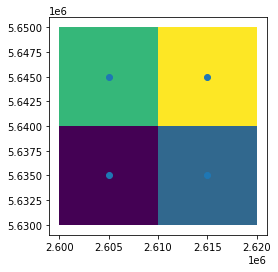

In [21]:
point2 = wrl.io.VectorSource("test_point.geojson")
poly2 = wrl.io.VectorSource("test_poly.geojson")
fig = pl.figure()
ax = fig.add_subplot(111)
poly2.geo.plot(column="index", ax=ax)
point2.geo.plot(ax=ax)

### reload raster geotiff

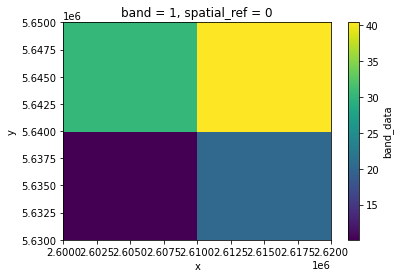

In [22]:
import xarray as xr
ds = xr.open_dataset("test_poly_raster.tif")
ds.band_data[0].plot()

### reload raster netcdf

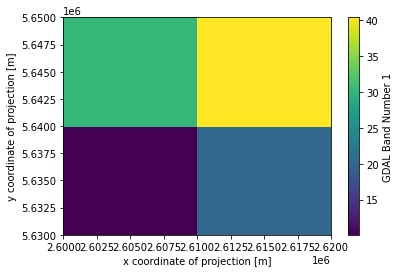

In [23]:
ds = xr.open_dataset("test_poly_raster.nc")
ds.Band1.plot()